# Introduction to Hypothesis Testing

## Hypothesis Testing — Detailed Theory

Hypothesis testing is a **formal statistical framework** for evaluating whether a sample provides enough evidence to infer a property of a population.

---

### 1. Formulation of Hypotheses
We define two competing statements:

- **Null Hypothesis ($H_0$)**  
  Represents the default assumption about the population.  
  Example: $H_0: \mu = \mu_0$ (no difference in means).

- **Alternative Hypothesis ($H_a$ or $H_1$)**  
  Represents the claim we want to investigate. It can be:
  - **Two-sided**: $H_a: \mu \neq \mu_0$
  - **Right-tailed**: $H_a: \mu > \mu_0$
  - **Left-tailed**: $H_a: \mu < \mu_0$

---

### 2. Significance Level ($\alpha$)
- $\alpha$ is the **probability of committing a Type I error**:
$$
\alpha = P(\text{Reject } H_0 \mid H_0 \text{ is true})
$$
- Typical choices: $\alpha = 0.05$ (5%), $\alpha = 0.01$ (1%).
- Smaller $\alpha$ → stricter test, lower probability of false positive.

---

### 3. Types of Statistical Errors
- **Type I Error**: Rejecting $H_0$ when it is actually true. Probability = $\alpha$.
- **Type II Error**: Failing to reject $H_0$ when $H_a$ is true. Probability = $\beta$.
- **Power of the test**: $1 - \beta$, probability of correctly rejecting $H_0$ when $H_a$ is true.

---

### 4. Choice of Test Statistic
The **test statistic** is a standardized measure of the difference between the sample statistic and the hypothesized population parameter.

- **Z-test**: When population variance is known, or $n$ is large (Central Limit Theorem applies).
- **t-test**: When variance is unknown, and we estimate it from the sample.
- **$\chi^2$-test**: For variance testing or categorical data association.
- **F-test**: For comparing variances or in ANOVA.

---

### 5. Decision Rule Using p-value
- **p-value** = Probability of observing a test statistic at least as extreme as the one calculated from the sample **assuming $H_0$ is true**.
- Decision criterion:
$$
\text{If } p\text{-value} < \alpha \quad \Rightarrow \quad \text{Reject } H_0
$$
Otherwise: Fail to reject $H_0$.

---

### 6. Example: One-Sample t-Test
Suppose:
- Hypothesized mean: $\mu_0$
- Sample mean: $\bar{X}$
- Sample standard deviation: $s$
- Sample size: $n$

Test statistic:
$$
t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}
$$

Degrees of freedom:
$$
df = n - 1
$$

We compare $t$ to the Student's t-distribution with $n-1$ degrees of freedom.

---

### 7. Graphical Interpretation
The rejection region is determined by $\alpha$ and the shape of the test statistic's distribution.

For a two-sided test:
$$
\text{Reject } H_0 \quad \text{if} \quad |t| > t_{\alpha/2, \, df}
$$

For a right-tailed test:
$$
\text{Reject } H_0 \quad \text{if} \quad t > t_{\alpha, \, df}
$$

For a left-tailed test:
$$
\text{Reject } H_0 \quad \text{if} \quad t < -t_{\alpha, \, df}
$$


### Common Tests:

1. **Z-Test**
   - Use when population variance is known or sample size is large ($n>30$).
   - Test statistic:
   $$
   Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
   $$

2. **t-Test**
   - Use when population variance is unknown and/or $n$ is small.
   - One-sample t-test: compare sample mean to hypothesized mean.
   - Two-sample t-test: compare means of two independent samples.
   $$
   t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{s_1^2/n_1 + s_2^2/n_2}}
   $$

3. **Chi-Square Test ($\chi^2$)**
   - Test categorical distributions or variances.
   - Test statistic:
   $$
   \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
   $$
   - $O_i$ = observed counts, $E_i$ = expected counts.

4. **F-Test / ANOVA**
   - Compare variances or means of multiple groups.
   - Test statistic:
   $$
   F = \frac{\text{variance between groups}}{\text{variance within groups}}
   $$


## Z-Test Example

Z-test statistic: 1.991 
p-value: 0.0465 


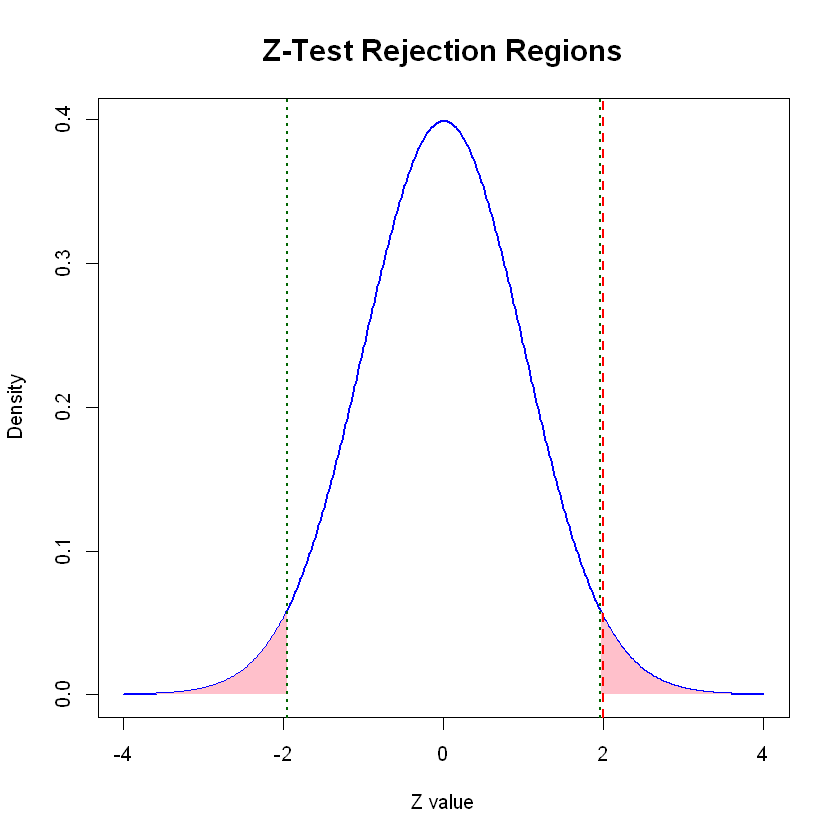

In [8]:
# Z-test example: known population variance
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)

# Sample data
set.seed(100)
sample_data <- rnorm(50, mean = 102, sd = 10)  # sample mean ~102
mu_0 <- 100                                     # hypothesized mean
sigma <- 10                                     # known population SD
n <- length(sample_data)

# Z statistic
z_stat <- (mean(sample_data) - mu_0) / (sigma / sqrt(n))

# Two-tailed p-value
p_value <- 2 * (1 - pnorm(abs(z_stat)))

# Print results
cat("Z-test statistic:", round(z_stat, 3), "\n")
cat("p-value:", round(p_value, 4), "\n")

# Visualize Z-distribution with rejection regions
x <- seq(-4, 4, length = 500)
y <- dnorm(x)
alpha <- 0.05
z_crit <- qnorm(1 - alpha/2)

plot(x, y, type = "l", lwd = 2, col = "blue",
     main = "Z-Test Rejection Regions", xlab = "Z value", ylab = "Density", cex.main = 1.5)
polygon(c(x[x <= -z_crit], -z_crit), c(y[x <= -z_crit], 0), col = "pink", border = NA)
polygon(c(x[x >= z_crit], z_crit), c(y[x >= z_crit], 0), col = "pink", border = NA)
abline(v = z_stat, col = "red", lwd = 2, lty = 2)
abline(v = c(-z_crit, z_crit), col = "darkgreen", lwd = 2, lty = 3)


## One-sample t-test


	One Sample t-test

data:  weights
t = -1.8409, df = 29, p-value = 0.07588
alternative hypothesis: true mean is not equal to 70
95 percent confidence interval:
 67.35545 70.13903
sample estimates:
mean of x 
 68.74724 



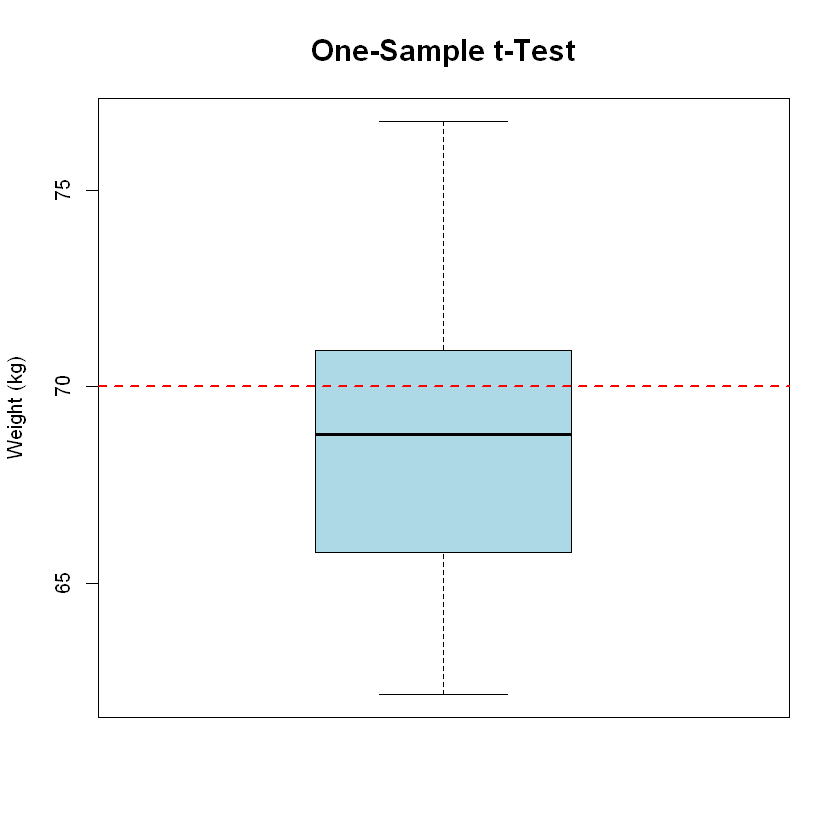

In [9]:
# One-sample t-test
weights <- rnorm(30, mean = 69, sd = 3)
mu_0 <- 70

t_result <- t.test(weights, mu = mu_0)
print(t_result)

# Boxplot
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
boxplot(weights, main = "One-Sample t-Test", ylab = "Weight (kg)", col = "lightblue", cex.main = 1.5)
abline(h = mu_0, col = "red", lwd = 2, lty = 2)


## Two-Sample t-Test Example


	Two Sample t-test

data:  group1 and group2
t = -3.5648, df = 48, p-value = 0.0008362
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.546965 -2.103721
sample estimates:
mean of x mean of y 
 79.73787  84.56321 



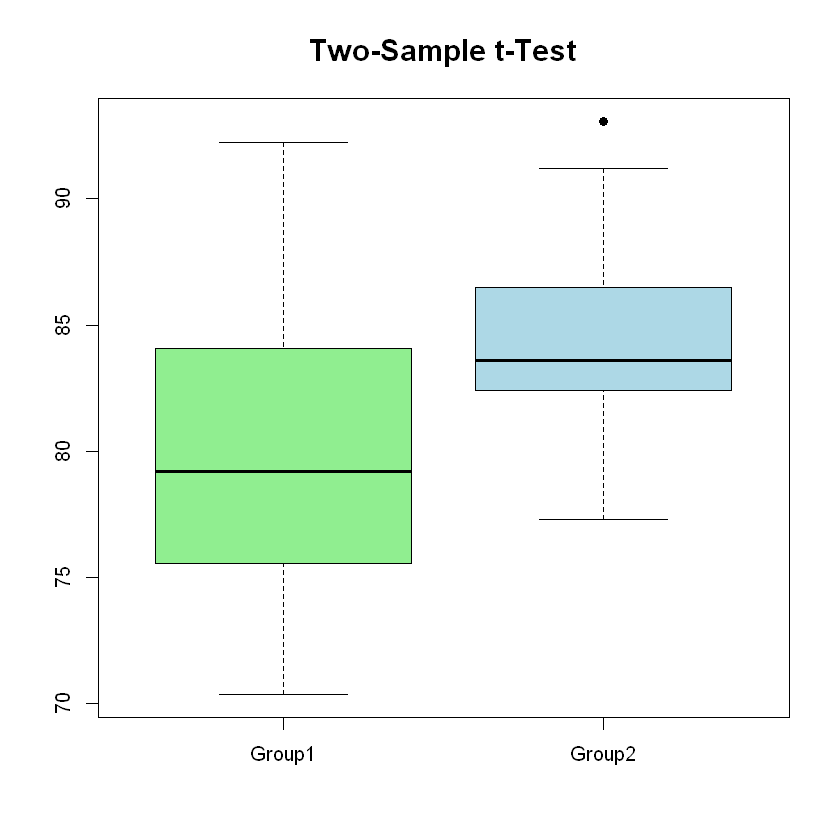

In [10]:
# Two independent samples
group1 <- rnorm(25, mean = 80, sd = 5)
group2 <- rnorm(25, mean = 85, sd = 5)

t2_result <- t.test(group1, group2, var.equal = TRUE)  # assuming equal variances
print(t2_result)

# Visual comparison
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
boxplot(group1, group2, names = c("Group1", "Group2"),
        main = "Two-Sample t-Test", col = c("lightgreen","lightblue"), cex.main = 1.5)

## Chi-Square Test Example


	Chi-squared test for given probabilities

data:  observed
X-squared = 5, df = 2, p-value = 0.08208



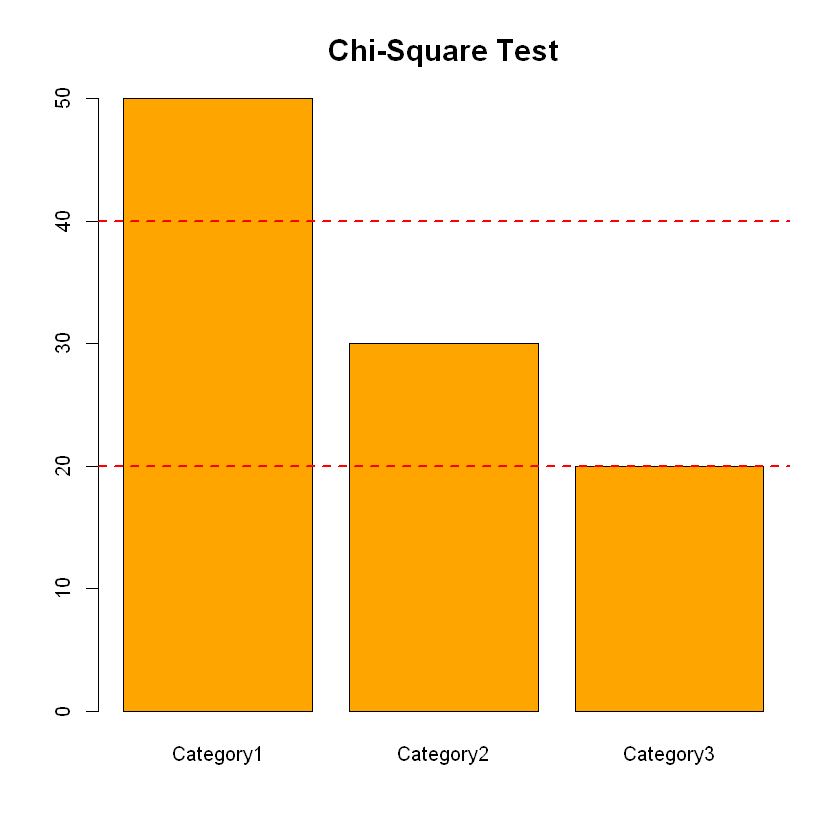

In [11]:
# Observed counts in categories
observed <- c(50, 30, 20)
expected <- c(40, 40, 20)

chi_result <- chisq.test(x = observed, p = expected/sum(expected))
print(chi_result)

# Barplot
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
barplot(observed, names.arg = c("Category1","Category2","Category3"),
        col = "orange", main = "Chi-Square Test", cex.main = 1.5)
abline(h = expected, col = "red", lty = 2, lwd = 2)


## F-Test / ANOVA Example

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2 1143.5   571.7   60.16 8.98e-15 ***
Residuals   57  541.7     9.5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


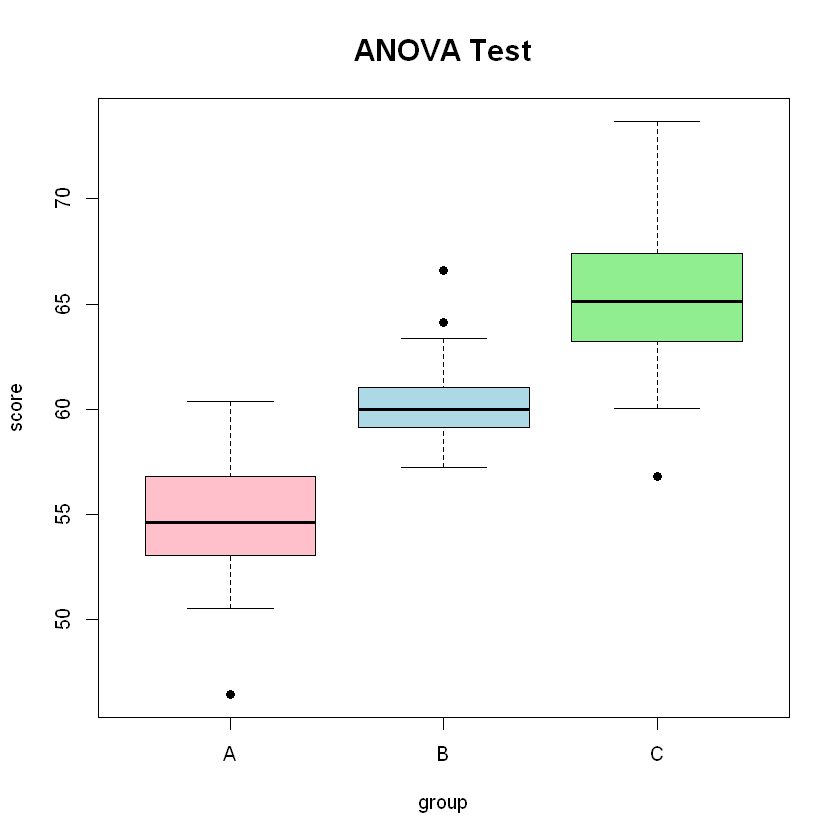

In [12]:
# Three groups for ANOVA
groupA <- rnorm(20, mean = 55, sd = 4)
groupB <- rnorm(20, mean = 60, sd = 4)
groupC <- rnorm(20, mean = 65, sd = 4)

data <- data.frame(
  score = c(groupA, groupB, groupC),
  group = factor(rep(c("A","B","C"), each = 20))
)

anova_result <- aov(score ~ group, data = data)
print(summary(anova_result))

# Boxplot
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
boxplot(score ~ group, data = data, main = "ANOVA Test", col = c("pink","lightblue","lightgreen"), cex.main = 1.5)


### Real-World Analogies

- **Z-Test**: Checking if a machine produces bolts with exact target length, variance known.  
- **t-Test**: Comparing average test scores between two small classrooms.  
- **Chi-Square Test**: Examining if observed survey preferences differ from expected distribution.  
- **ANOVA / F-Test**: Comparing average yields across multiple fertilizer types in agriculture.
